# Customer Churn Analysis<br>
## Problem Statement:<br>
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.<br>

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.<br>

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. <br>

We will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Telecom_customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


There are 7043 rows and 21 columns. Churn column would be our target variable.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1) SeniorCitizen, tenure and MonthlyCharges are number data type all the other features are Object types.<br>
2) Of all the features TotalCharges should be in float as MonthlyCharges. The feature is in Object type, we will need to change that.<br>
3) Looking at the data, most of them are categories. we will look into each feature and understand how to proceed on building a model.<br>
4) There are no null values, however, we will be sure when we look at each feature.

I will drop customerId as this just an id and not helpful.

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# EDA AND PREPROCESSING

<AxesSubplot:xlabel='Churn', ylabel='count'>

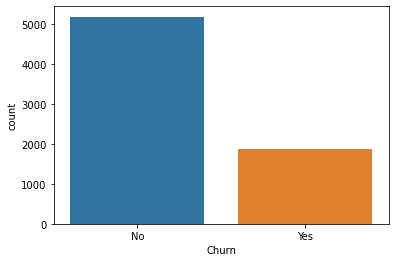

In [6]:
sns.countplot(df['Churn'])

In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

There are 73.46% of customer with no Churn and 26.54% with yes Churn. 

<AxesSubplot:xlabel='gender', ylabel='count'>

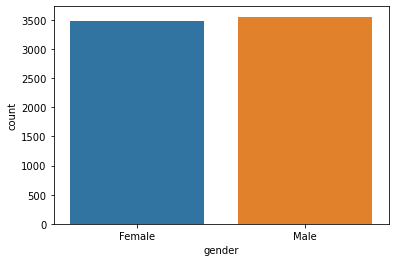

In [8]:
sns.countplot(df['gender'])

In [9]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

There are equal number of Males and Females in data set. This feature may not be helpful? We will try to look inot that question.

<AxesSubplot:xlabel='gender', ylabel='count'>

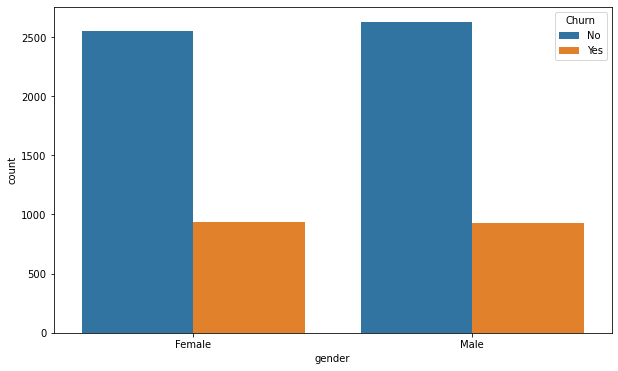

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(df['gender'], hue=df['Churn'])

There seem to be equal number of customer churn with both classes (Male and female)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

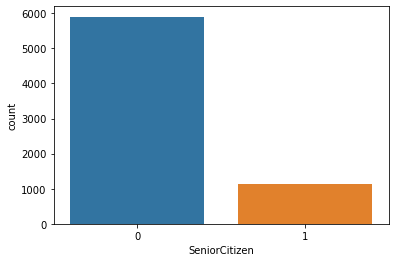

In [11]:
sns.countplot(df['SeniorCitizen'])

In [12]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

There are very less number of Senior Citizens

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

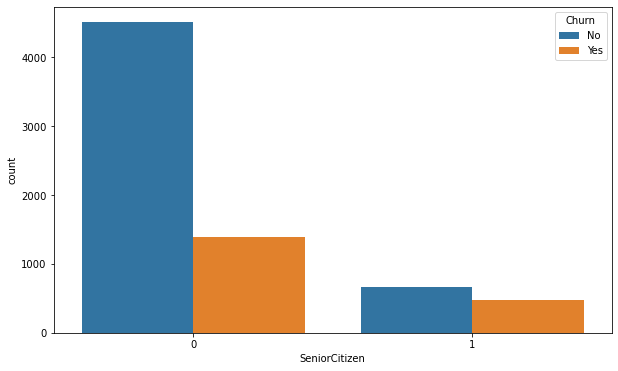

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(df['SeniorCitizen'], hue=df['Churn'])

As the Churn number is less it show the low Churn rate in this feature as well, however, about 40% of the Senior citizen opt to use the service

<AxesSubplot:xlabel='Partner', ylabel='count'>

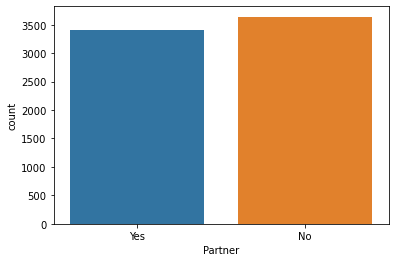

In [14]:
sns.countplot(df['Partner'])

In [15]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

There are comparetively equal number of people who are single and with partners.

<AxesSubplot:xlabel='Partner', ylabel='count'>

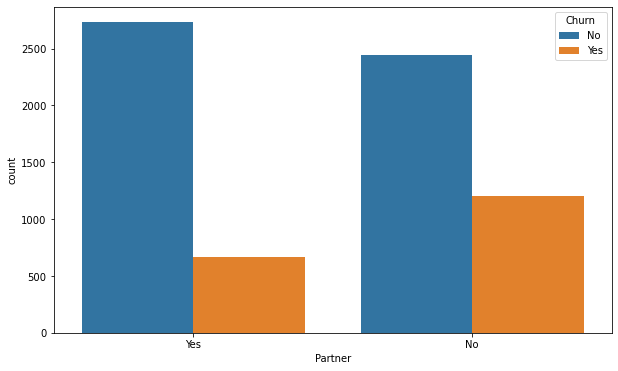

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(df['Partner'], hue=df['Churn'])

There is a high number of churn rate with No partners than with partners.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

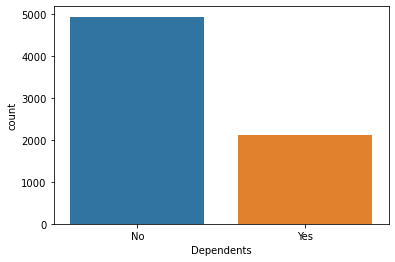

In [17]:
sns.countplot(df['Dependents'])

In [18]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

Customers having dependents are less, that means that the customer churn would be less?

<AxesSubplot:xlabel='Dependents', ylabel='count'>

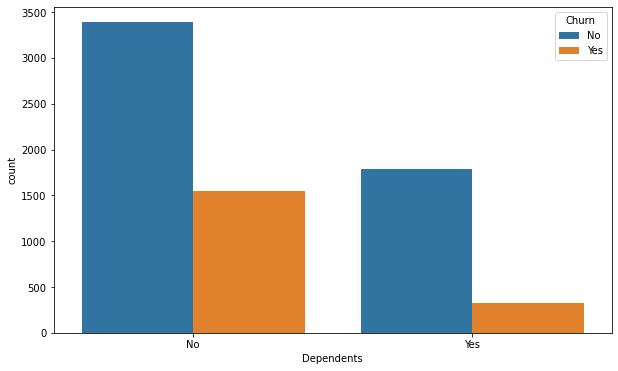

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(df['Dependents'], hue=df['Churn'])

Yes, as we assumed, customer with dependents have less churn rate than with customers with no dependents.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

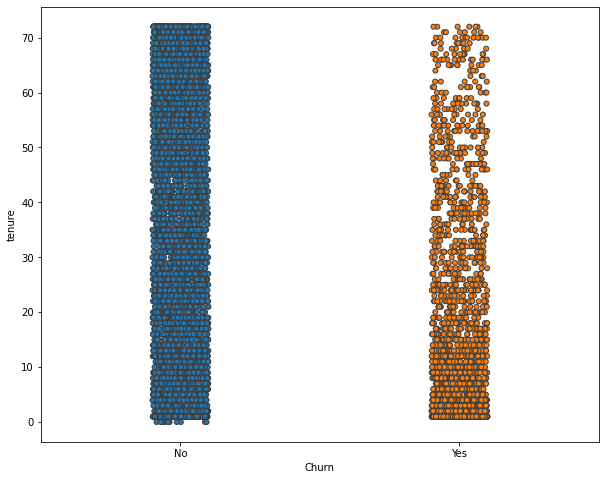

In [20]:
plt.figure(figsize=(10,8))
sns.stripplot(df['Churn'], df['tenure'], linewidth=1)

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

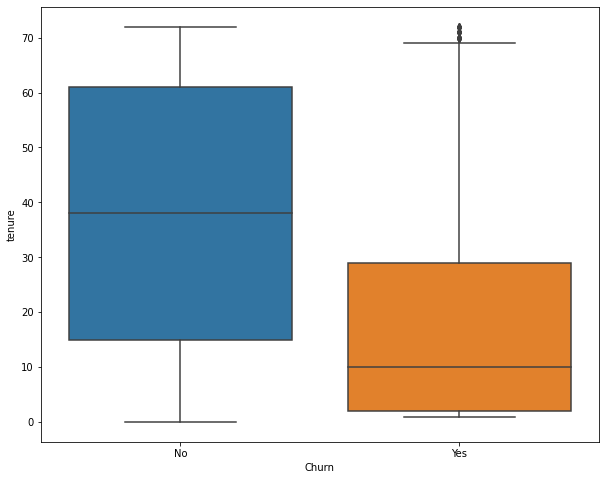

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(df['Churn'], df['tenure'])

As the tenure increases the the customer churn decreases. However, there are a few outliers in the Churn yes category

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

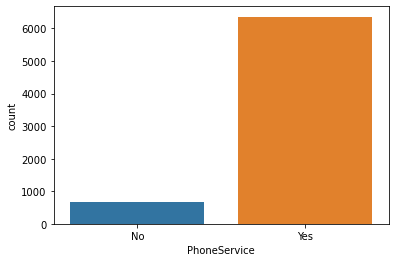

In [22]:
sns.countplot(df['PhoneService'])

In [23]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

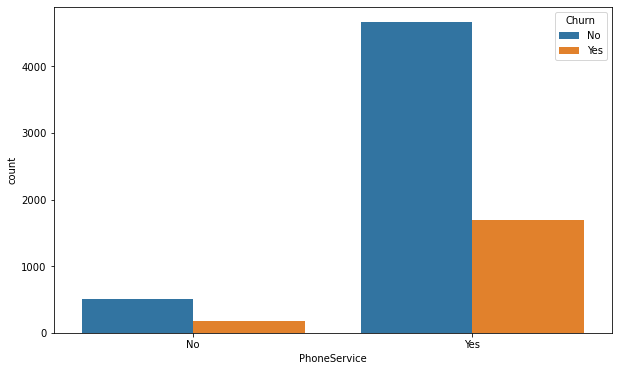

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(df['PhoneService'], hue=df['Churn'])

There are very low entries with no phone service. Customer do opt for phone service more.

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

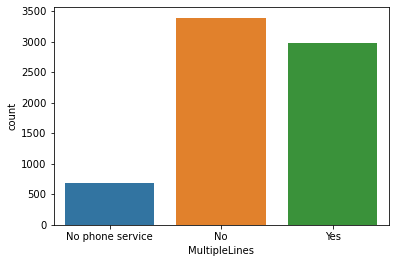

In [25]:
sns.countplot(df['MultipleLines'])

In [26]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

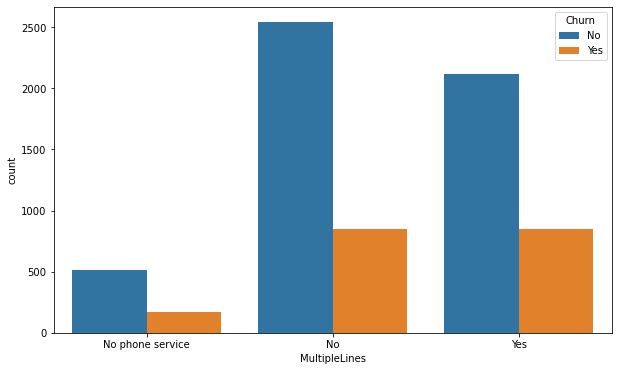

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(df['MultipleLines'], hue=df['Churn'])

so Yes PhoneService is divided into 2971 muliple lines and with 3390 with single line.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

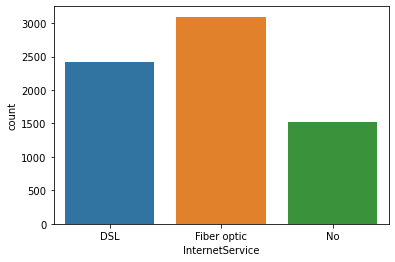

In [28]:
sns.countplot(df['InternetService'])

In [29]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='InternetService', ylabel='count'>

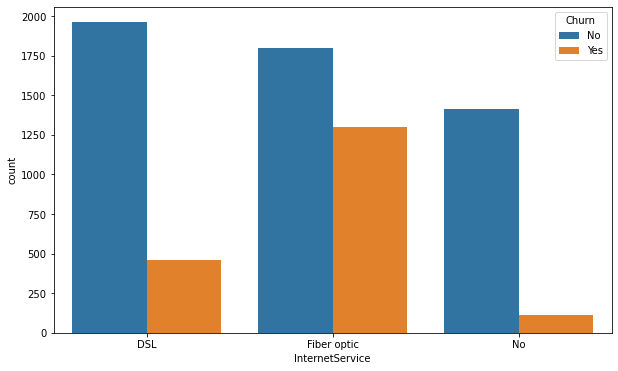

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(df['InternetService'], hue=df['Churn'])

Customer with no Internet services are low. Customers prefer FiberOptic and has more churn than DSL.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

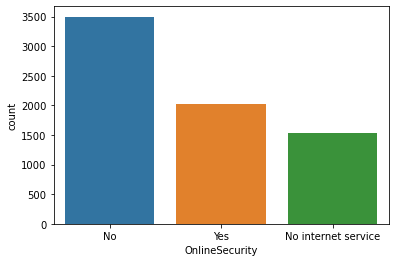

In [31]:
sns.countplot(df['OnlineSecurity'])

In [32]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

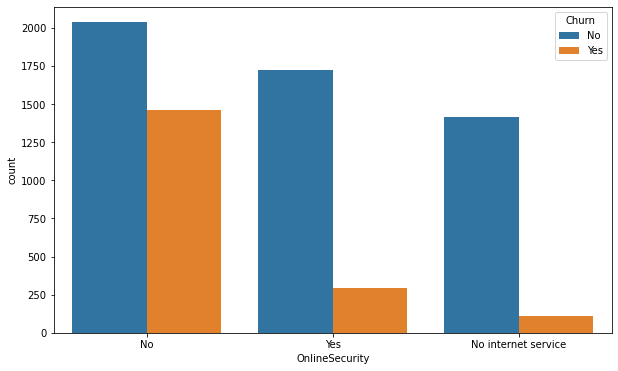

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(df['OnlineSecurity'], hue=df['Churn'])

Customer with no Internet security has more churn

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

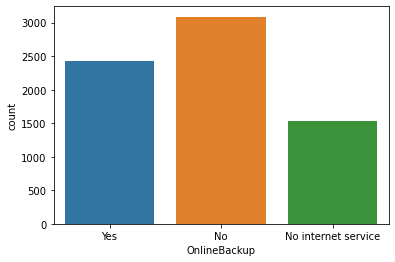

In [34]:
sns.countplot(df['OnlineBackup'])

In [35]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

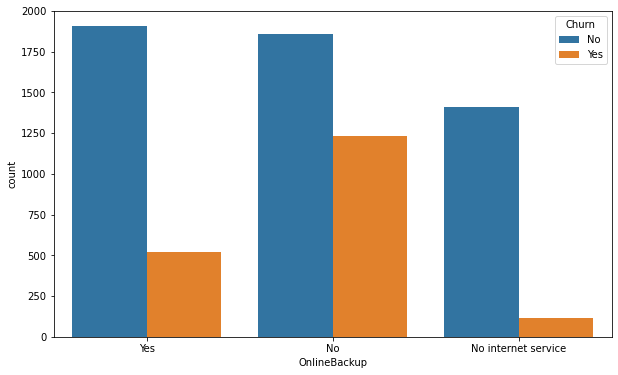

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(df['OnlineBackup'], hue=df['Churn'])

Customer with no online backup has more customer churn.

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

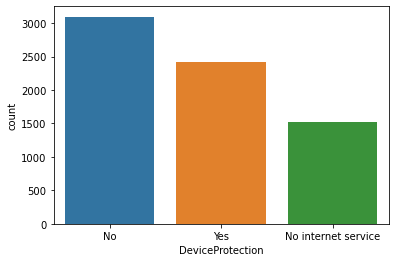

In [37]:
sns.countplot(df['DeviceProtection'])

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

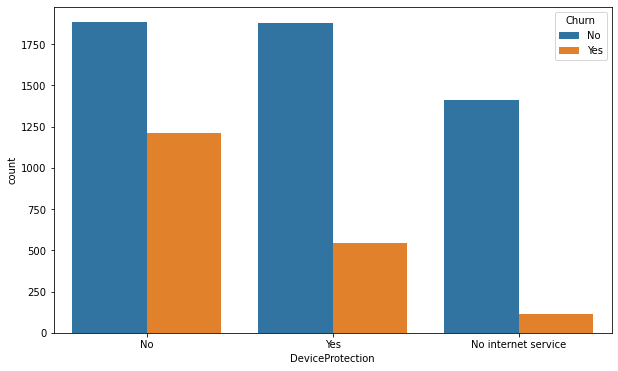

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(df['DeviceProtection'], hue=df['Churn'])

Customer with no DeviceProtection has more customer churn.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

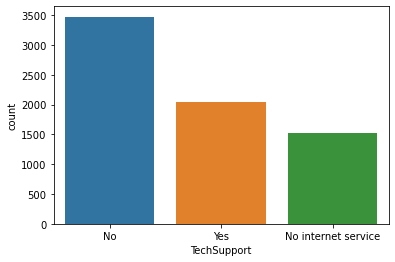

In [39]:
sns.countplot(df['TechSupport'])

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

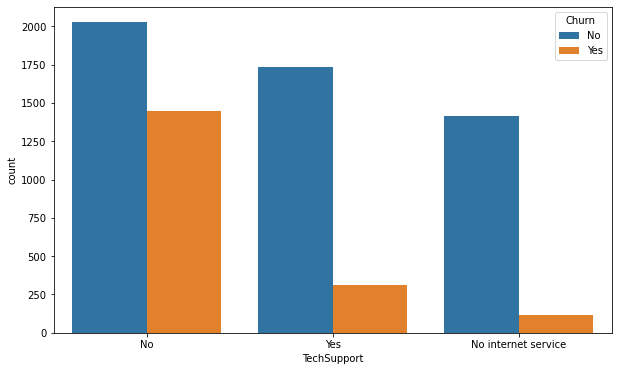

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(df['TechSupport'], hue=df['Churn'])

Customer with no TechSupport has more customer churn.

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

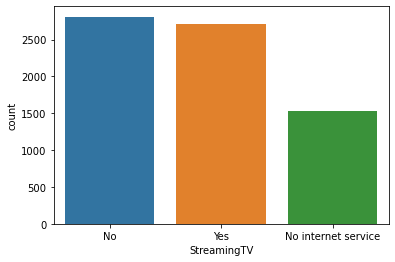

In [41]:
sns.countplot(df['StreamingTV'])

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

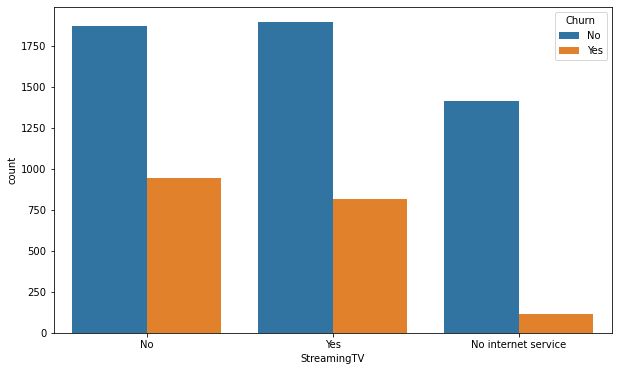

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(df['StreamingTV'], hue=df['Churn'])

There are equal number of categories in both Yes and no categories in StreamingTV

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

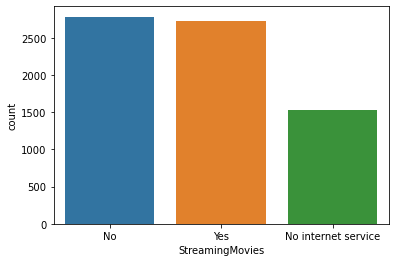

In [43]:
sns.countplot(df['StreamingMovies'])

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

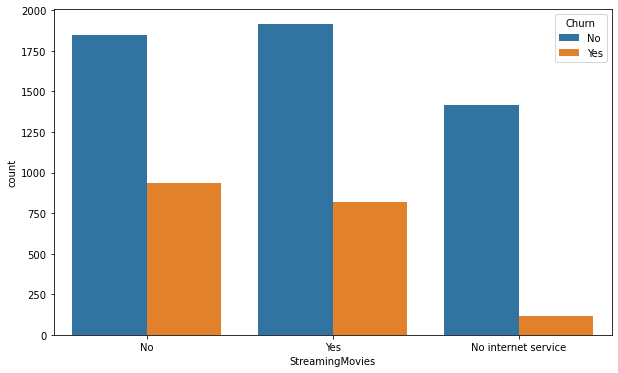

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(df['StreamingMovies'], hue=df['Churn'])

Same goes with this column as well.

<AxesSubplot:xlabel='Contract', ylabel='count'>

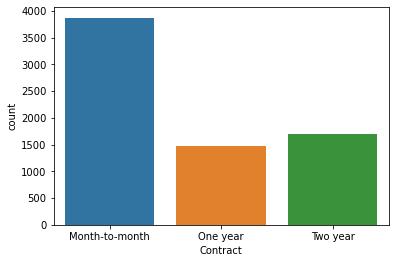

In [45]:
sns.countplot(df['Contract'])

In [46]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

More customers opt for Month-to-month type of subscription.

<AxesSubplot:xlabel='Contract', ylabel='count'>

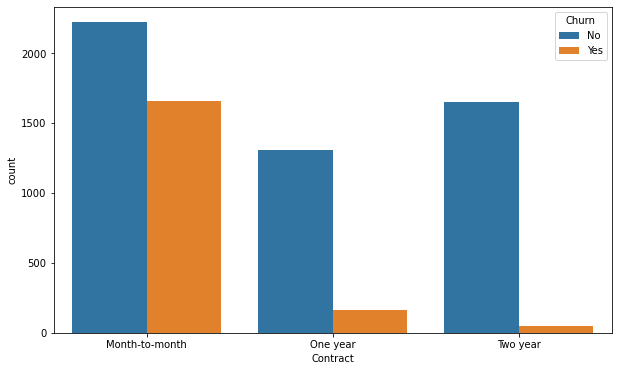

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(df['Contract'], hue=df['Churn'])

And the churn is more in Month-to-month subscription.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

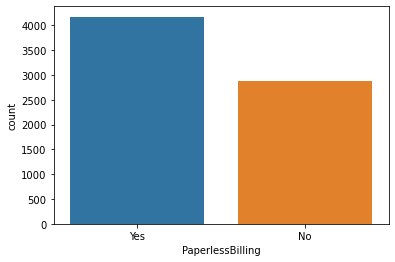

In [48]:
sns.countplot(df['PaperlessBilling'])

In [49]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

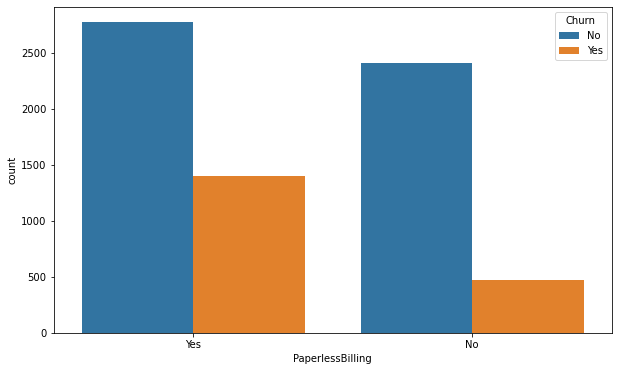

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(df['PaperlessBilling'], hue=df['Churn'])

Customer with yes paperlessbilling has more customer churn.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

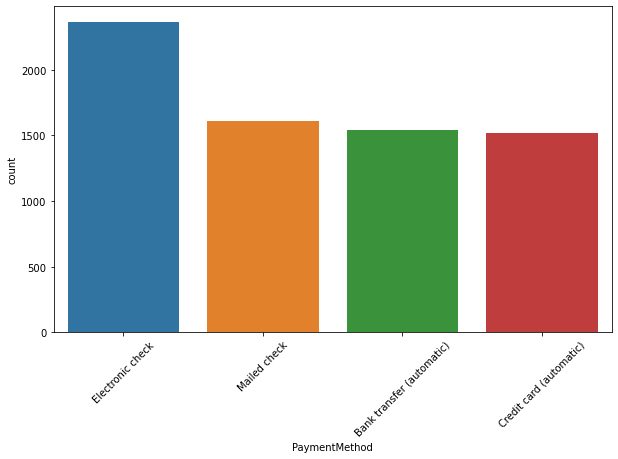

In [51]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.countplot(df['PaymentMethod'])

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

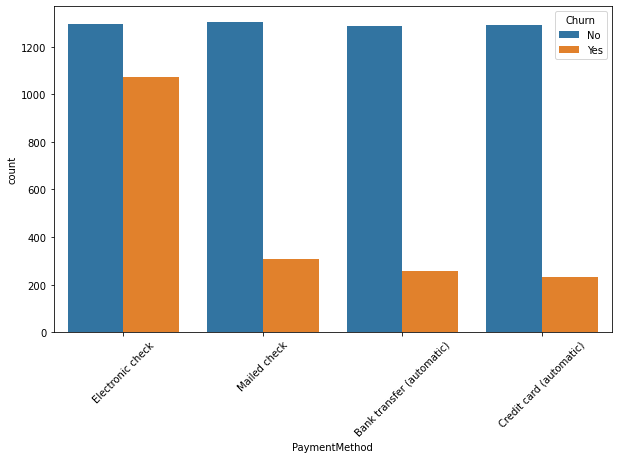

In [52]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.countplot(df['PaymentMethod'], hue=df['Churn'])

Electronic check payment method has more customer churn

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

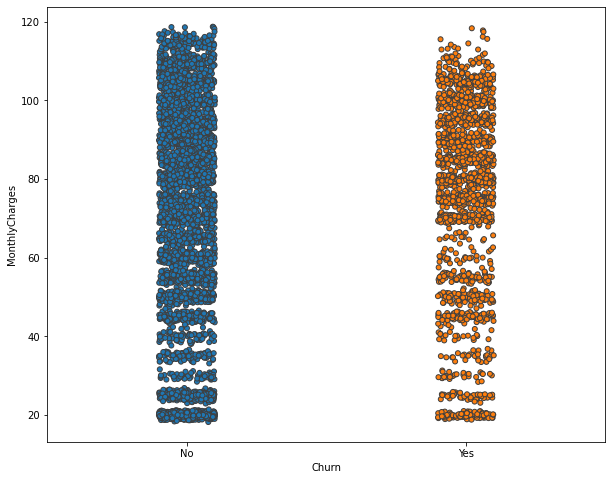

In [53]:
plt.figure(figsize=(10,8))
sns.stripplot(df['Churn'], df['MonthlyCharges'], linewidth=1)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

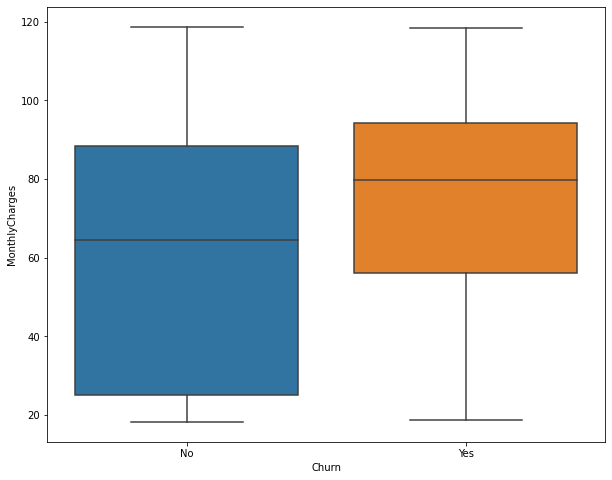

In [54]:
plt.figure(figsize=(10,8))
sns.boxplot(df['Churn'], df['MonthlyCharges'])

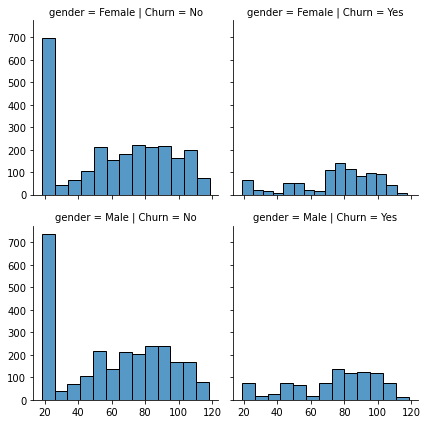

In [55]:
g = sns.FacetGrid(df, col="Churn",  row="gender")
g.map_dataframe(sns.histplot, x="MonthlyCharges")

The mean of Monthly charges for No Churn is less than Yes category. Let's check the Total Charges.<br>
Less the monthly charges more the rate of churn

In [56]:
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

TotalCharges feature is in object type to make this convenient we will create a new column.

In [57]:
df['Total_Charges'] = df['tenure'] * df['MonthlyCharges']

<AxesSubplot:xlabel='Churn', ylabel='Total_Charges'>

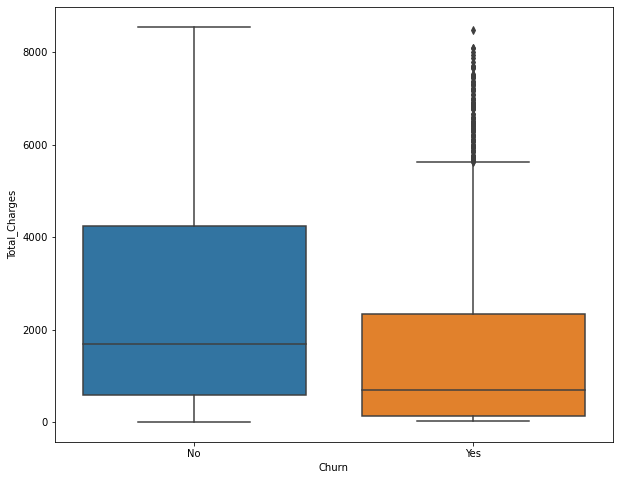

In [58]:
plt.figure(figsize=(10,8))
sns.boxplot(df['Churn'], df['Total_Charges'])

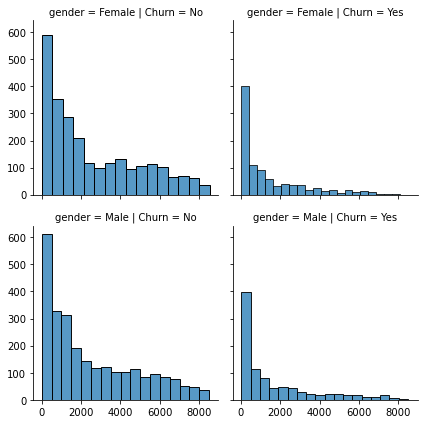

In [59]:
g = sns.FacetGrid(df, col="Churn",  row="gender")
g.map_dataframe(sns.histplot, x="Total_Charges")

If the total charges are low then we can expect customer to come back and use the services irrespective of the gender.

In [60]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Total_Charges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1936.30
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,107.70
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1903.50
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,141.40


Looking at the features TotalCharges and Total_Charges there are slight difference in the charges as well. This could be an error entering  the data. We do not see any discounts in the data and will look at the original column as an effect of data entry error.

<AxesSubplot:>

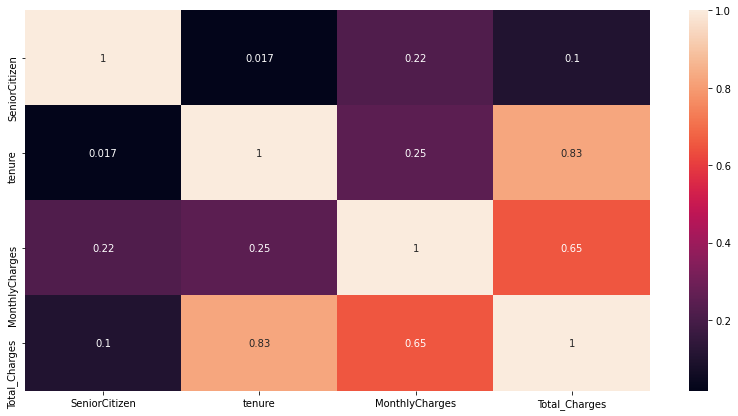

In [61]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

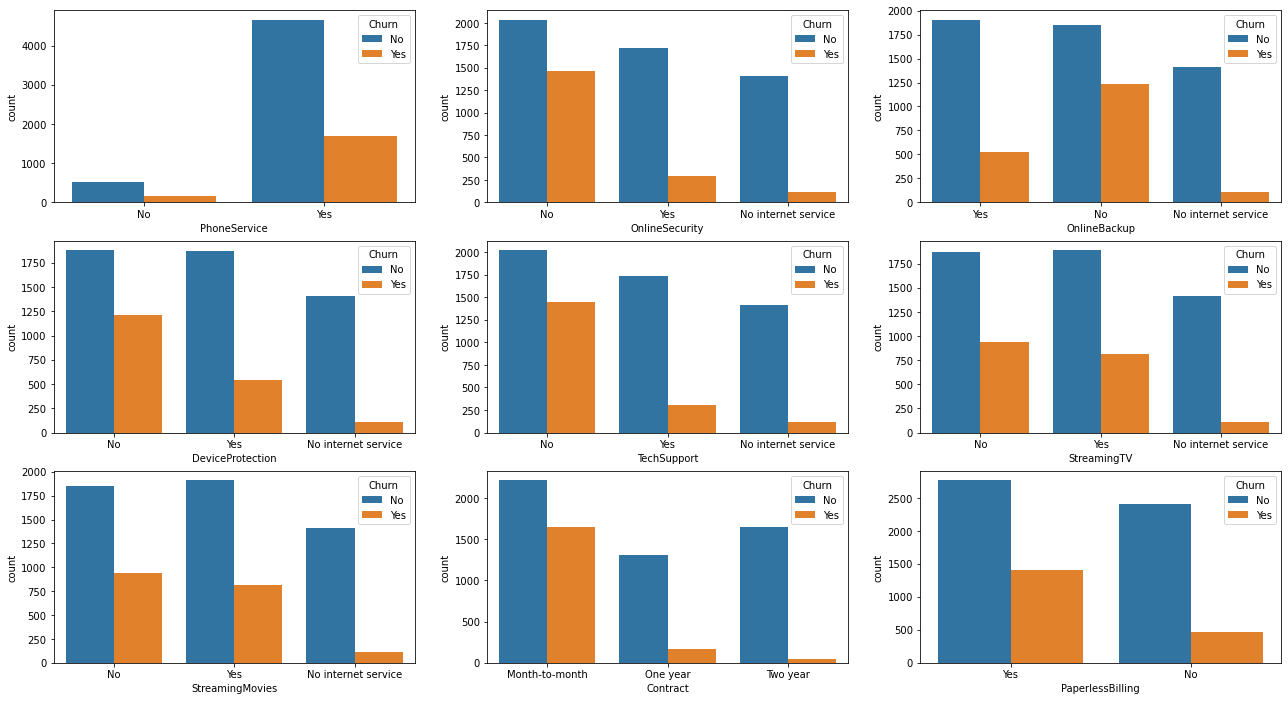

In [62]:
figure, axes = plt.subplots(3,3, figsize=(22,12))
sns.countplot(ax=axes[0,0], data=df, hue= 'Churn', x= 'PhoneService')
sns.countplot(ax=axes[0,1], data=df, hue= 'Churn', x= 'OnlineSecurity')
sns.countplot(ax=axes[0,2], data=df, hue= 'Churn', x= 'OnlineBackup')
sns.countplot(ax=axes[1,0], data=df, hue= 'Churn', x= 'DeviceProtection')
sns.countplot(ax=axes[1,1], data=df, hue= 'Churn', x= 'TechSupport')
sns.countplot(ax=axes[1,2], data=df, hue= 'Churn', x= 'StreamingTV')
sns.countplot(ax=axes[2,0], data=df, hue= 'Churn', x= 'StreamingMovies')
sns.countplot(ax=axes[2,1], data=df, hue= 'Churn', x= 'Contract')
sns.countplot(ax=axes[2,2], data=df, hue= 'Churn', x= 'PaperlessBilling')

**Observations:**<br>
1) There are very low entries with no phone service. Customer do opt for phone service more.<br>
2) PhoneService is divided into 2971 muliple lines and with 3390 with single line.<br>
3) Customer with no Internet services are low. Customers prefer FiberOptic and has more churn than DSL.<br>
4) Customer with no Internet security has more churn.<br>
5) Customer with no online backup has more customer churn.<br>
6) Customer with no TechSupport has more customer churn.<br>
7) There are equal number of categories in both Yes and no categories in StreamingTV.<br>
8) More customers opt for Month-to-month type of subscription.<br>
9) Customer with yes paperlessbilling has more customer churn.

# ENCODING

In [63]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

In [64]:
df['SeniorCitizen'] = le.fit_transform(df['SeniorCitizen'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['gender'] = le.fit_transform(df['gender'])

SeniorCitizen, Partner, Dependents, PhoneService and PaperlessBilling have only 2 categories, hence used LabelEncoder to encode them into binary numbers. Column Churn as it is the target feature.

In [65]:
df.drop(['customerID','TotalCharges'], axis=1, inplace=True)

We dropped customer ID as this is not usefull and TotalCharges has wrong data as we found.

## Using get_dummies on Object data type columns.

For coulumns MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport, StreamingTV , StreamingMovies , Contract and PaymentMethod we will used get_dummies method to encode them.

In [66]:
dummies = pd.get_dummies(df[[ 'MultipleLines' , 'InternetService' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' ,
                             'TechSupport', 'StreamingTV' , 'StreamingMovies' , 'Contract', 'PaymentMethod']], drop_first=True)

In [67]:
df.drop([ 'MultipleLines' , 'InternetService' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' ,
                             'TechSupport', 'StreamingTV' , 'StreamingMovies' , 'Contract', 'PaymentMethod'],axis=1,inplace=True)

In [68]:
merged = pd.concat([df,dummies], axis='columns')

In [69]:
merged

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,Total_Charges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,0,29.85,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,0,1936.30,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,1,107.70,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,0,1903.50,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,1,141.40,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,0,2035.20,...,1,0,1,0,1,1,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,0,7430.40,...,0,0,1,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,0,325.60,...,0,0,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,1,297.60,...,0,0,0,0,0,0,0,0,0,1


In [70]:
df = merged

# SKEWNESS AND OUTLIERS.


In [71]:
df.skew()

gender                                  -0.019031
SeniorCitizen                            1.833633
Partner                                  0.067922
Dependents                               0.875199
tenure                                   0.239540
PhoneService                            -2.727153
PaperlessBilling                        -0.375396
MonthlyCharges                          -0.220524
Churn                                    1.063031
Total_Charges                            0.960637
MultipleLines_No phone service           2.727153
MultipleLines_Yes                        0.316610
InternetService_Fiber optic              0.243494
InternetService_No                       1.375769
OnlineSecurity_No internet service       1.375769
OnlineSecurity_Yes                       0.943722
OnlineBackup_No internet service         1.375769
OnlineBackup_Yes                         0.652817
DeviceProtection_No internet service     1.375769
DeviceProtection_Yes                     0.657450


In [72]:
#function for detecting outliers when feature has skewness (by IQR)

def outlier_IQR(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*1.5)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*1.5)
    return(lower_bridge,upper_bridge)

#function for detecting outliers when feature has huge skewness (by IQR)

def outlier_IQR3(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*3)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*3)
    return(lower_bridge,upper_bridge)

#function for detecting outliers when feature has Normally Distributed (by mean-+3dtf)

def outlier_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    return(lower_boundary,upper_boundary)

#function for checking data is Normally Distributed by QQ-plot.

from scipy import stats
import pylab

def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name], dist="norm", plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("Original_dist")
    plt.show()

#function for LOG transformation Technique

def log_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = np.log(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("log_transform")
        plt.show()

#function for Reciprocal transformation Technique

def reciprocal_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = 1/data_frame_copy[feature_name] 
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("reciprocal_transform")
        plt.show()

#function for Square root transformation Technique

def squareroot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("squareroot_transform")
        plt.show()

#function for Exponential transformation Technique

def exponential_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/1.2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("exponential_transform")
        plt.show()

#function for Box cox transformation Technique

def boxcox_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = stats.boxcox(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("boxcox_transform")
        plt.show()

def log1p_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    data_frame_copy[feature_name] = np.log1p(data_frame_copy[feature_name])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    data_frame_copy[feature_name].hist()
    plt.title("log1p_transform")
    plt.show()

## Column MonthlyCharges

In [73]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

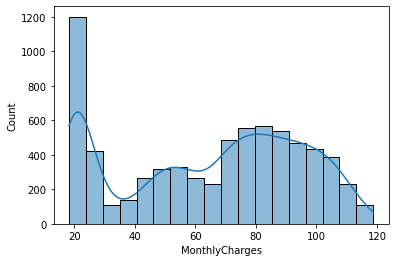

In [74]:
sns.histplot(df['MonthlyCharges'], kde=True)

<AxesSubplot:xlabel='MonthlyCharges'>

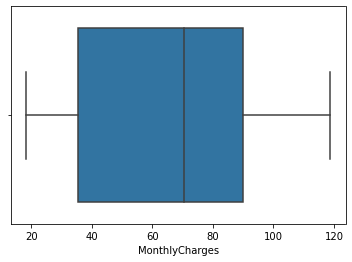

In [75]:
sns.boxplot(df['MonthlyCharges'])

No outliers. Let's treat skewness.

In [76]:
df['MonthlyCharges'].skew()

-0.22052443394398033

Skewness and outlier in place.

## Column Total_Charges.

In [77]:
df['Total_Charges'].describe()

count    7043.000000
mean     2279.581350
std      2264.729447
min         0.000000
25%       394.000000
50%      1393.600000
75%      3786.100000
max      8550.000000
Name: Total_Charges, dtype: float64

<AxesSubplot:xlabel='Total_Charges', ylabel='Count'>

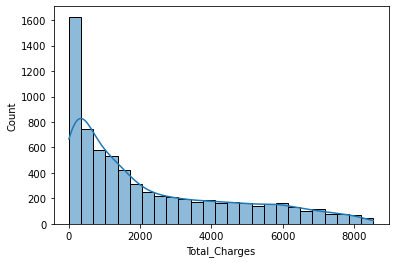

In [78]:
sns.histplot(df['Total_Charges'], kde=True)

<AxesSubplot:xlabel='Total_Charges'>

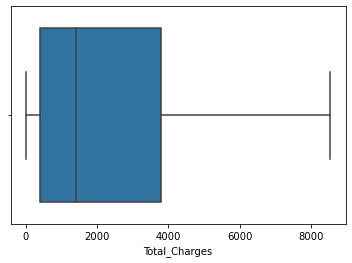

In [79]:
sns.boxplot(df['Total_Charges'])

In [80]:
df['Total_Charges'].skew()

0.9606366798869088

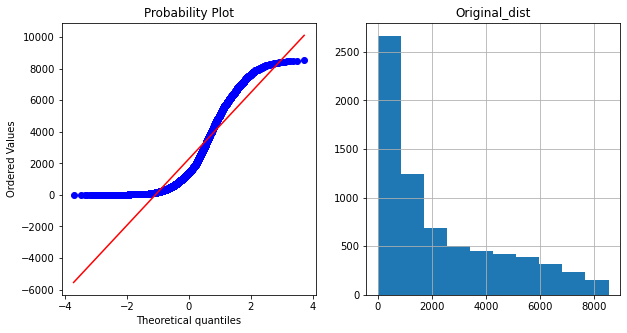

In [81]:
original_dist(df, 'Total_Charges')

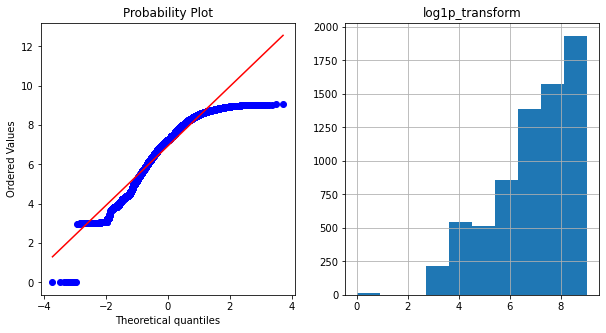

In [82]:
log_transform(df,'Total_Charges')

reciprocal_transform(df,'Total_Charges')

squareroot_transform(df,'Total_Charges')

log1p_transform(df,'Total_Charges')

In [83]:
df['Total_Charges'] = np.log1p(df['Total_Charges'])
df['Total_Charges'].skew()

-0.8244582595144284

Unable to reduce the skewness, I will make suer to use Tree Algorithms to counter this.

## Column tenure

In [84]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

<AxesSubplot:xlabel='tenure', ylabel='Count'>

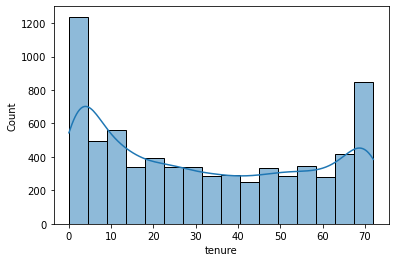

In [85]:
sns.histplot(df['tenure'], kde=True)

<AxesSubplot:xlabel='tenure'>

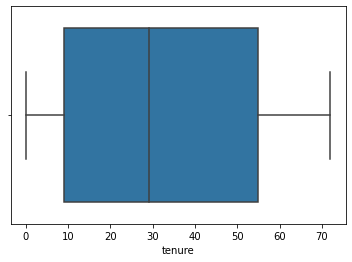

In [86]:
sns.boxplot(df['tenure'])

In [87]:
df['tenure'].skew()

0.2395397495619829

All good with this column

In [88]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

**We will consider this problem as data imbalance problem**

# DEALING WITH DATA IMBALANCE PROBLEM.


In [89]:
x = df.drop('Churn',axis=1)
y = df['Churn']

## Method1:  UnderSampling.


In [91]:
ch_yes = df[df['Churn']==1]
ch_no = df[df['Churn']==0]

**1 = Yes , 0 = No for Churn**

In [92]:
ch_yes.shape

(1869, 31)

In [93]:
ch_no.shape

(5174, 31)

We would want 1869 samples from ch_no.

In [95]:
Under_sample = ch_no.sample(1869)

In [96]:
test_under = pd.concat([Under_sample, ch_yes], axis=0)

In [97]:
test_under['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

We have created a new DataFrame with same amount of two classes for this data.

In [98]:
x1 = test_under.drop('Churn', axis=1)
y1 = test_under['Churn']

## Finding the best random state for the model

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
maxAccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.20,random_state=i)
    lr = DecisionTreeClassifier()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.7205882352941176 on random state 46


We will try other technique and se if we get a better acciracy score than 72.05%

## Method 2: OverSampling

In [101]:
over_sample = ch_yes.sample(5174, replace=True)

In [102]:
over_sample.shape

(5174, 31)

In [103]:
ch_no.shape

(5174, 31)

In [104]:
test_over = pd.concat([ch_no, over_sample], axis=0)

In [105]:
test_over['Churn'].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [106]:
x2 = test_over.drop('Churn', axis=1)
y2 = test_over['Churn']

## Finding the best random state for the model

In [107]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.20,random_state=i)
    lr = DecisionTreeClassifier()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.8946859903381642 on random state 1


Awesome, accuracy jumped from 72.05% to 89.46%.

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.20,random_state=1)

## Testing models

In [109]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.7695652173913043
[[765 284]
 [193 828]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1049
           1       0.74      0.81      0.78      1021

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



In [110]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8884057971014493
[[877 172]
 [ 59 962]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.88      1049
           1       0.85      0.94      0.89      1021

    accuracy                           0.89      2070
   macro avg       0.89      0.89      0.89      2070
weighted avg       0.89      0.89      0.89      2070



In [111]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.9024154589371981
[[902 147]
 [ 55 966]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1049
           1       0.87      0.95      0.91      1021

    accuracy                           0.90      2070
   macro avg       0.91      0.90      0.90      2070
weighted avg       0.91      0.90      0.90      2070



In [112]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.7705314009661836
[[758 291]
 [184 837]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1049
           1       0.74      0.82      0.78      1021

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



In [113]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.7874396135265701
[[737 312]
 [128 893]]
              precision    recall  f1-score   support

           0       0.85      0.70      0.77      1049
           1       0.74      0.87      0.80      1021

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.79      0.79      2070



In [114]:
sv = SVC()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.7536231884057971
[[753 296]
 [214 807]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1049
           1       0.73      0.79      0.76      1021

    accuracy                           0.75      2070
   macro avg       0.76      0.75      0.75      2070
weighted avg       0.76      0.75      0.75      2070



In [115]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.7855072463768116
[[782 267]
 [177 844]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1049
           1       0.76      0.83      0.79      1021

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



Random forest performed well. However, Let's crossvalidate.

# Crossvalidation

In [116]:
from sklearn.model_selection import cross_val_score
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest Classifier:", rfc.mean())

Cross validation score of Random Forest Classifier: 0.7905730813278276


In [117]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree Classifier:", dtc.mean())

Cross validation score of Decision Tree Classifier: 0.7283825771017485


In [118]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors Classifier:", knc.mean())

Cross validation score of Kneigbors Classifier: 0.7721141283308601


In [119]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Logistic Regression Classifier:", lrc.mean())

Cross validation score of Logistic Regression Classifier: 0.8056241531711723


In [120]:
ad = cross_val_score(ad, x, y, cv=5)

print("Cross validation score of AdaBoost Classifier:", rfc.mean())

Cross validation score of AdaBoost Classifier: 0.7905730813278276


In [121]:
gb = cross_val_score(gb, x, y, cv=5)

print("Cross validation score of GradientBoost Classifier:", rfc.mean())

Cross validation score of GradientBoost Classifier: 0.7905730813278276


Looking at the values Random forest has more promising results. We will Perform Hyperparameter Tuning 

## Hyperparameter Tuning

In [123]:
from sklearn.model_selection import RandomizedSearchCV

In [124]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'criterion':['gini', 'entropy'],'max_depth': np.arange(2,10),
             'max_features':['auto','sqrt', 'log2'],'n_estimators':[10,50,100,150] }

In [125]:
RCV = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=5)
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 50, 100, 150]})

In [126]:
#Printing the best parameters.
RCV.best_params_

{'n_estimators': 150,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'entropy'}

## Final Model

In [134]:
model1 = RandomForestClassifier(n_estimators=150, max_features= 'auto', max_depth= 9, criterion= 'entropy', random_state=1)
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

81.78743961352657
[[790 238]
 [139 903]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1028
           1       0.79      0.87      0.83      1042

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



We will try SMOTE and look at our final accuracy scores.

# Method 3: SMOTE

In [128]:
from imblearn.over_sampling import SMOTE

In [129]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [130]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_sample(x,y)

In [131]:
y_sm.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

## Finding the best random state for the model

In [132]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.20,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.8405797101449275 on random state 71


The accuracy is low then OverSampling method, however, cannot conclude just yet.

In [135]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.20,random_state=71)

## Testing models

In [136]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8405797101449275
[[828 210]
 [120 912]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1038
           1       0.81      0.88      0.85      1032

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



In [137]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8009661835748793
[[819 219]
 [193 839]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1038
           1       0.79      0.81      0.80      1032

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



In [138]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8632850241545894
[[880 158]
 [125 907]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1038
           1       0.85      0.88      0.87      1032

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



In [139]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8381642512077294
[[810 228]
 [107 925]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1038
           1       0.80      0.90      0.85      1032

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



In [140]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8101449275362319
[[722 316]
 [ 77 955]]
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1038
           1       0.75      0.93      0.83      1032

    accuracy                           0.81      2070
   macro avg       0.83      0.81      0.81      2070
weighted avg       0.83      0.81      0.81      2070



In [141]:
sv = SVC()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.7584541062801933
[[735 303]
 [197 835]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1038
           1       0.73      0.81      0.77      1032

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070



In [142]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8429951690821256
[[830 208]
 [117 915]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1038
           1       0.81      0.89      0.85      1032

    accuracy                           0.84      2070
   macro avg       0.85      0.84      0.84      2070
weighted avg       0.85      0.84      0.84      2070



Random forest performed well. However, Let's crossvalidate.

# Crossvalidation

In [143]:
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest Classifier:", rfc.mean())

Cross validation score of Random Forest Classifier: 0.7902909058648946


In [144]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree Classifier:", dtc.mean())

Cross validation score of Decision Tree Classifier: 0.7265370951351701


In [145]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors Classifier:", knc.mean())

Cross validation score of Kneigbors Classifier: 0.7721141283308601


In [146]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Logistic Regression Classifier:", lrc.mean())

Cross validation score of Logistic Regression Classifier: 0.8056241531711723


In [147]:
ad = cross_val_score(ad, x, y, cv=5)

print("Cross validation score of AdaBoost Classifier:", rfc.mean())

Cross validation score of AdaBoost Classifier: 0.7902909058648946


In [148]:
gb = cross_val_score(gb, x, y, cv=5)

print("Cross validation score of GradientBoost Classifier:", rfc.mean())

Cross validation score of GradientBoost Classifier: 0.7902909058648946


Looking at the values Random forest and Logistic Regression has more promising results. We will Perform Hyperparameter Tuning 

## Hyperparameter Tuning for RF

In [149]:
from sklearn.model_selection import RandomizedSearchCV

In [150]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'criterion':['gini', 'entropy'],'max_depth': np.arange(2,10),
             'max_features':['auto','sqrt', 'log2'],'n_estimators':[10,50,100,150] }

In [151]:
RCV = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=5)
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 50, 100, 150]})

In [152]:
#Printing the best parameters.
RCV.best_params_

{'n_estimators': 150,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'entropy'}

## Final Model with RF

In [153]:
model2 = RandomForestClassifier(n_estimators=150, max_features= 'auto', max_depth= 9, criterion= 'entropy', random_state=71)
model2.fit(x_train,y_train)
pred = model2.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

84.15458937198068
[[819 219]
 [109 923]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1038
           1       0.81      0.89      0.85      1032

    accuracy                           0.84      2070
   macro avg       0.85      0.84      0.84      2070
weighted avg       0.85      0.84      0.84      2070



We got a good accuracy then Oversampling technique, however, let's look at Logistic Regression as well.

## Hyperparameter Tuning for LR

In [154]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'solver':['newton-cg', 'lbfgs','liblinear','sag','saga'],'penalty': ['l1', 'l2', 'elasticnet', 'one'],
             'multi_class':['auto','ovr', 'multinomial'],'n_jobs':np.arange(1,5) }

In [155]:
RCV = RandomizedSearchCV(LogisticRegression(), parameters, cv=5)
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'n_jobs': array([1, 2, 3, 4]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'one'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [156]:
#Printing the best parameters.
RCV.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'n_jobs': 2, 'multi_class': 'auto'}

## Final Model with LR

In [157]:
model3 = LogisticRegression(solver='liblinear', penalty='l2', n_jobs= 2, multi_class='auto')
model3.fit(x_train,y_train)
pred = model3.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

84.15458937198068
[[845 193]
 [135 897]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1038
           1       0.82      0.87      0.85      1032

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



# CONCLUSION.

We got same results with Logistic and Random Forest regressions. We will save any one of the two models.

# SAVING THE BEST MODEL FOR SUBMISSION.

model2 and model3 from SMOTE would be the best model with 84.154% accuracy.

In [158]:
import joblib
joblib.dump(model2,"Telecom_customer_churn_Project_submission.pkl")

['Telecom_customer_churn_Project_submission.pkl']